# Objective: #

### **Each submission will be used to assess the effectiveness of making small pre- and post-processing changes to the overall predictive capability of a random forest model** ###

### *The submissions will occur in the following order:* ###

> 1. Training using numerical data only. Preprocessing: Highly correlated variables dropped and NaN columns dropped from training data. NaNs in test data are replaced by 0. 

> 2. Training using numerical data only. Preprocessing: Target variable ('SalePrice') log-transformed to exhibit a normal distribution. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RFR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Import training data
trainDF = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
trainDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Least expensive: 34900
Most expensive: 755000


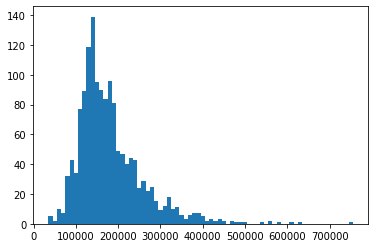

In [3]:
# Plot distribution of SalePrice (target)

print('Least expensive: ' + str(trainDF['SalePrice'].min()))
print('Most expensive: ' + str(trainDF['SalePrice'].max()))

plt.hist(trainDF['SalePrice'], bins=range(trainDF['SalePrice'].min(),trainDF['SalePrice'].max(), 10000))
plt.show()

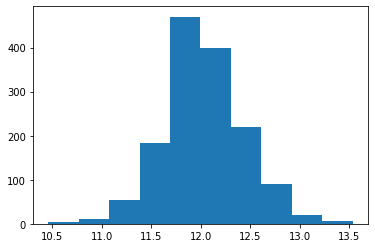

In [4]:
# Log transform and plot the 'SalePrice' variable
trainDF['SalePrice'] = np.log1p(trainDF['SalePrice'])
plt.hist(trainDF['SalePrice'])
plt.show()

In [5]:
# Separate 'object' and 'numerical' columns into separate dataframes for further analysis
objDF = trainDF[trainDF.dtypes[trainDF.dtypes == object].index]
numDF = trainDF[trainDF.dtypes[trainDF.dtypes != object].index]
numDF.drop(columns='SalePrice', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


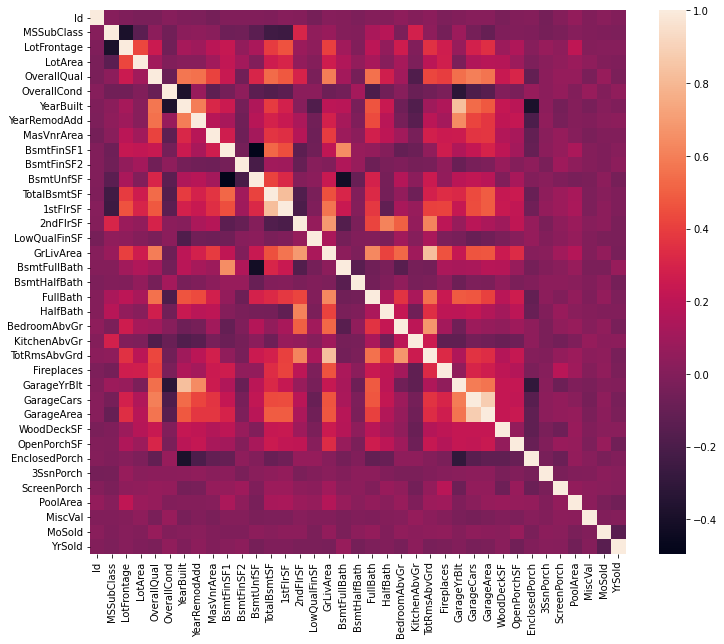

In [6]:
# Generate correlation matrix for numerical data
plt.figure(figsize=(12,10))
sns.heatmap(numDF.corr())
plt.show()

In [7]:
# Drop highly correlated variables
numDF.drop(columns='GarageArea', inplace=True)

In [8]:
# Check for and handle numerical NaN
numDF.columns[numDF.isna().any()].tolist()
numDF.dropna(axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
# Generate and fit the model. Get model importances
model = RFR(n_estimators=150, bootstrap=True, oob_score=True)
model.fit(numDF, trainDF['SalePrice'])
important_features = pd.DataFrame(model.feature_importances_, index = numDF.columns,
                                  columns = ['Model Importances'])

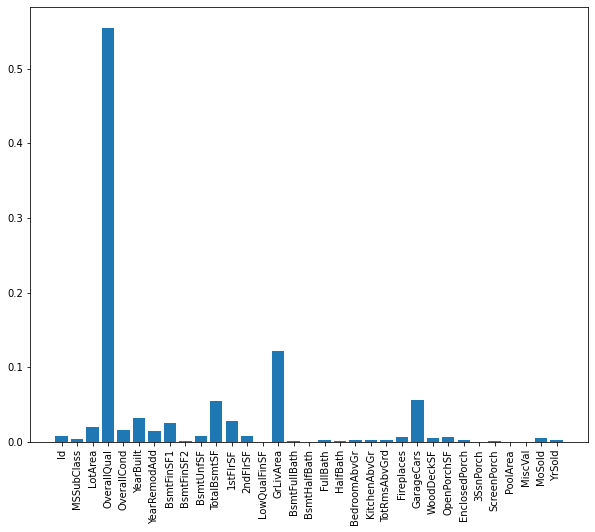

In [10]:
# Plot model importances. 
# Model can be rerun with only the most important features for better fit/less computation time
plt.figure(figsize=(10,8))
plt.bar(important_features.index, important_features['Model Importances'])
plt.xticks(rotation=90)
plt.show()

In [11]:
# Import test data
testDF = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
numTest = testDF[numDF.columns]
numTest.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,1.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,1.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,2.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,2.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,2.0,0,82,0,0,144,0,0,1,2010


In [12]:
# Fill NaNs in test dataset
test_nan_list = numTest.columns[numTest.isna().any()].tolist()
numTest[test_nan_list] = numTest[test_nan_list].fillna(0)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
# Make predictions with current model and find inverse of the log output
y_pred_transformed = model.predict(numTest)
y_pred = np.expm1(y_pred_transformed)

In [14]:
submission = numTest[['Id']]
submission['SalePrice'] = y_pred
submission.to_csv('submission.csv', index=False)
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,SalePrice
0,1461,125878.024979
1,1462,150561.643259
2,1463,180608.127211
3,1464,179180.352680
4,1465,190606.081572
...,...,...
1454,2915,81441.546928
1455,2916,84426.503355
1456,2917,153650.968263
1457,2918,116136.074406
